In [1]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [3]:
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri)
filmes.head()

filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [0]:
from sklearn.cluster import KMeans

In [8]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 0 1 2]


In [9]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.05541577 -0.02393945 -0.2883139  -0.23736405 -0.25073359 -0.76844036
   0.14751184  0.1644128   0.38289404 -0.1812225   0.08466223  0.18581597
  -0.08748371 -0.08792041  0.16396716 -0.10591052 -0.02385225  0.31536266
   0.11953423  0.03944259]
 [-0.05917995  0.7282437   1.70152074  1.32788136  1.22493207 -0.14032758
  -0.26229384 -0.21065422 -0.61193389  0.99780352 -0.08738164 -0.23958899
   0.60203281  0.15092061 -0.14440996 -0.28539371  0.62352773 -0.18997437
  -0.14717197 -0.02271012]
 [-0.05917995 -0.27427499 -0.28677635 -0.20496859 -0.14066886  1.23069201
  -0.11282859 -0.16061447 -0.32226683 -0.14965923 -0.09170652 -0.18087804
  -0.12360196  0.06955798 -0.18820265  0.28314827 -0.22972438 -0.39942934
 

In [10]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.055416,-0.023939,-0.288314,-0.237364,-0.250734,-0.768440,0.147512,0.164413,0.382894,-0.181222,0.084662,0.185816,-0.087484,-0.087920,0.163967,-0.105911,-0.023852,0.315363,0.119534,0.039443
1,-0.059180,0.728244,1.701521,1.327881,1.224932,-0.140328,-0.262294,-0.210654,-0.611934,0.997804,-0.087382,-0.239589,0.602033,0.150921,-0.144410,-0.285394,0.623528,-0.189974,-0.147172,-0.022710
2,-0.059180,-0.274275,-0.286776,-0.204969,-0.140669,1.230692,-0.112829,-0.160614,-0.322267,-0.149659,-0.091707,-0.180878,-0.123602,0.069558,-0.188203,0.283148,-0.229724,-0.399429,-0.119325,-0.050405


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff31925d630>,
      dtype=object)

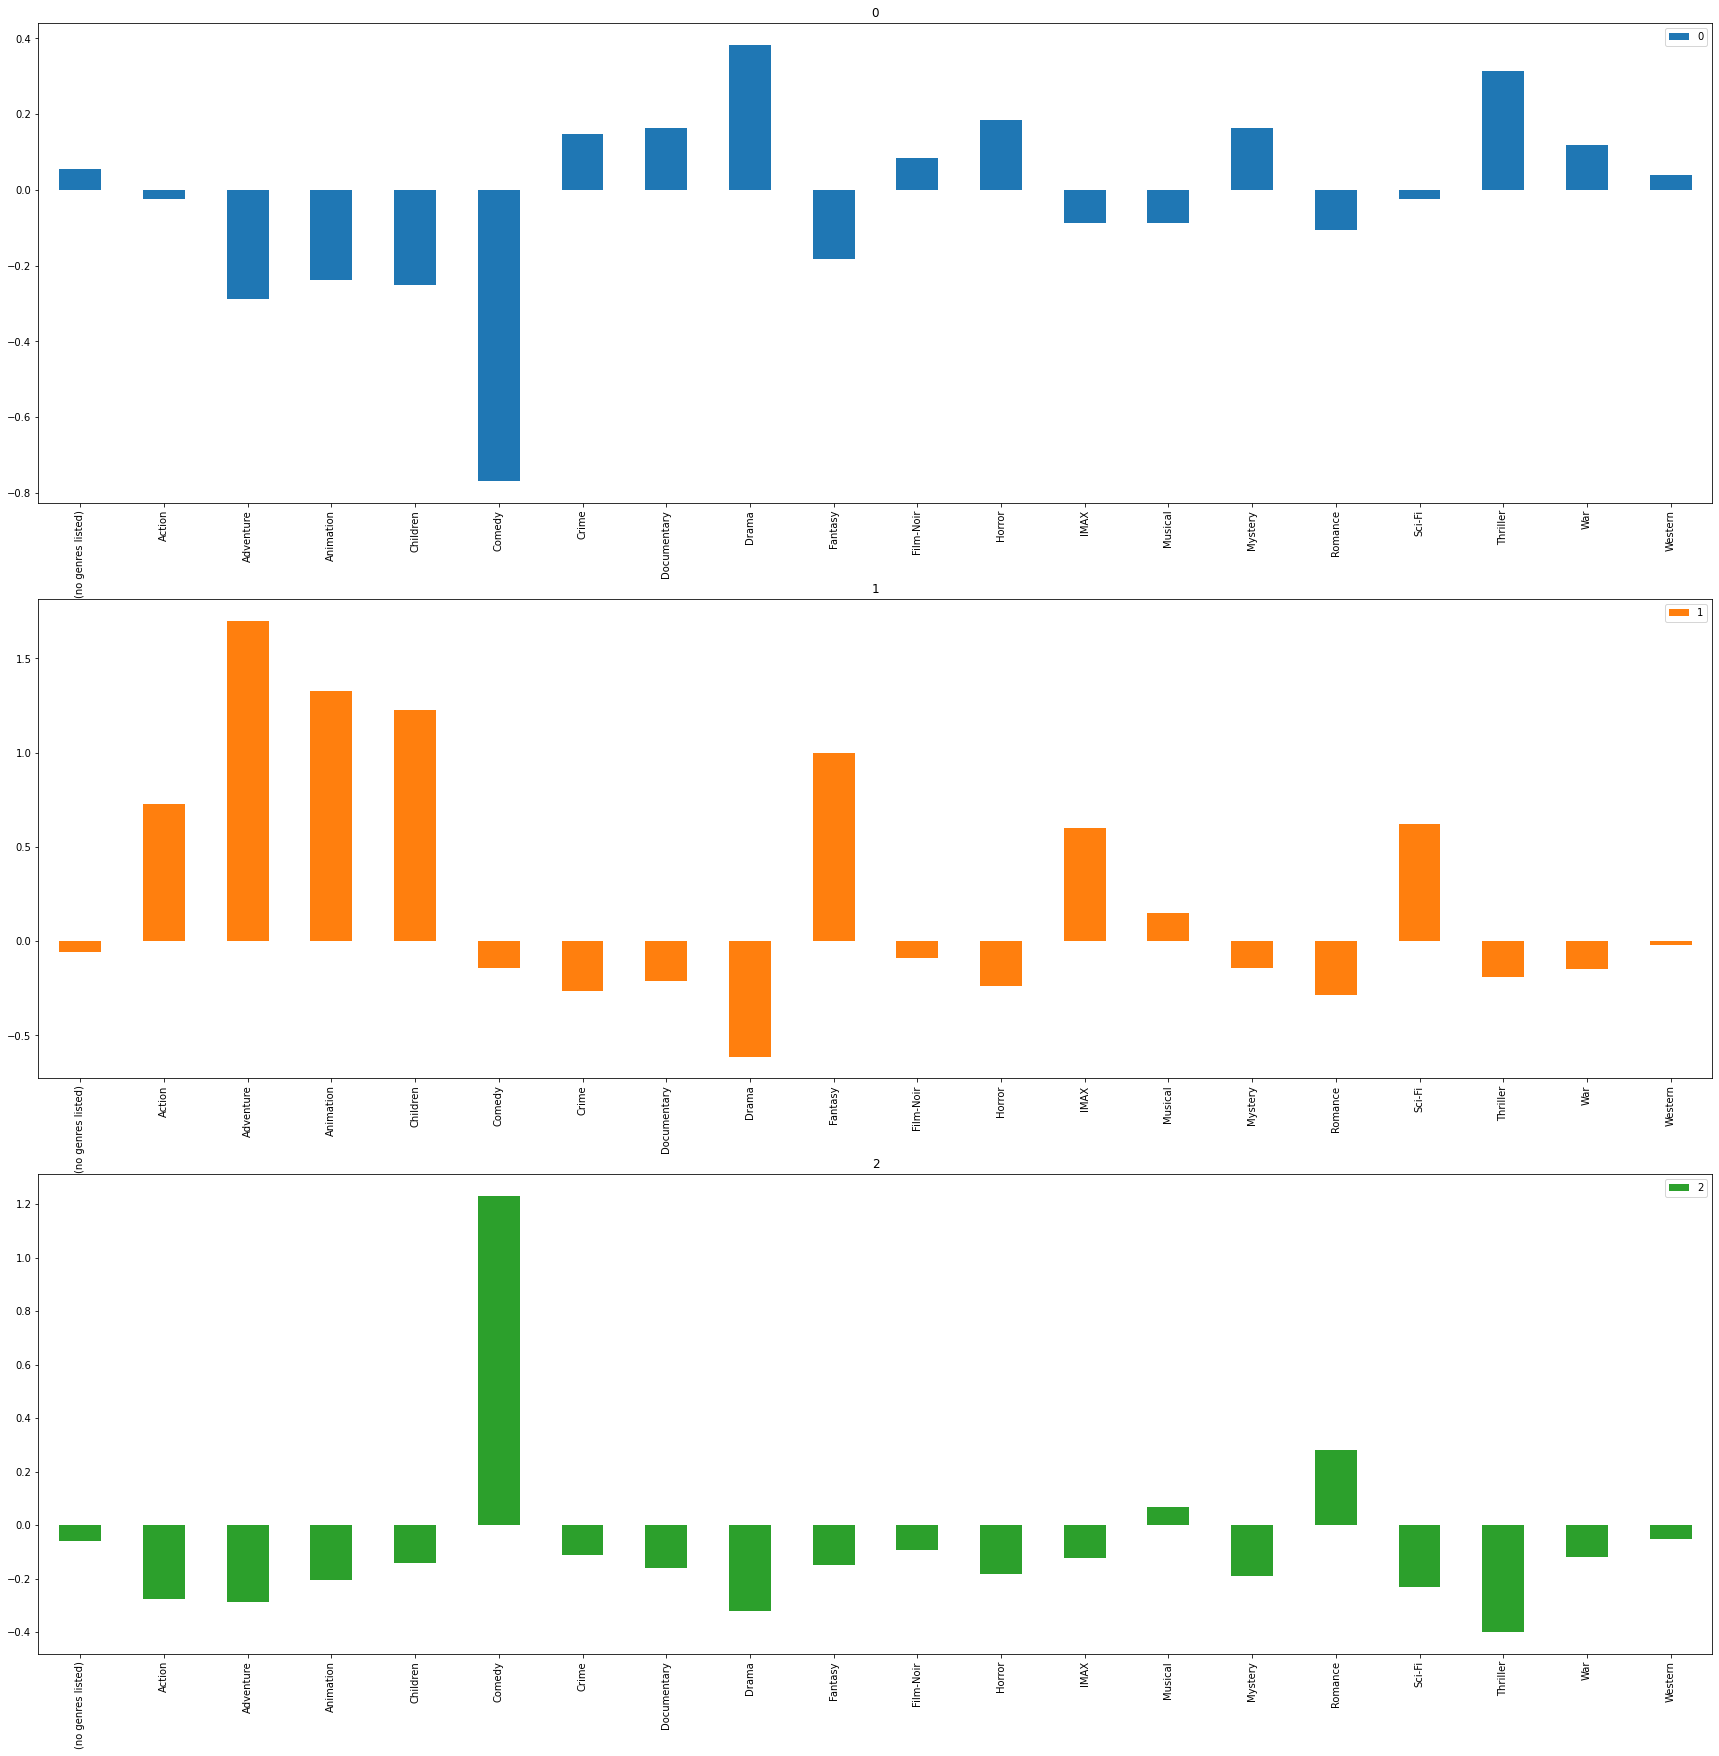

In [11]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,30),
                sharex=False)

In [12]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1011,1322,Amityville 1992: It's About Time (1992),Horror,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6847,61705,Lakeview Terrace (2008),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5536,26603,Prince of Darkness (1987),Fantasy|Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0
7185,72378,2012 (2009),Action|Drama|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4576,6797,Bugsy (1991),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
7596,86548,Water for Elephants (2011),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4436,6552,Dirty Pretty Things (2002),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
6678,57843,Rise of the Footsoldier (2007),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3752,5226,All the Right Moves (1983),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7726,90524,Abduction (2011),Action|Drama|Mystery|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [0]:
#from sklearn.datasets import make_blobs
#dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
#dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
#dados.head()

In [0]:
#import matplotlib.pyplot as plt

#plt.scatter(x=dados.coluna1, y=dados.coluna2)

In [0]:
#modelo = KMeans(n_clusters=3)
#grupos = modelo.fit_predict(dados)
#plt.scatter(x=dados.coluna1, y=dados.coluna2, 
#            c=grupos,
#           cmap='viridis')

In [0]:
#centroides = modelo.cluster_centers_
#plt.scatter(dados.coluna1, dados.coluna2,
#            c=grupos,
#           cmap='viridis')
#plt.scatter(centroides[:, 0], centroides[:, 1],
#           marker='X', s=169, linewidths=5,
#           color='g', zorder=8)


In [0]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 23.645763 , -47.87702  ],
       [ 12.16109  , -61.03076  ],
       [-12.8679   ,  46.87339  ],
       ...,
       [  8.984133 ,   8.087189 ],
       [-39.967747 , -26.16221  ],
       [  1.6376886, -32.60982  ]], dtype=float32)

In [13]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


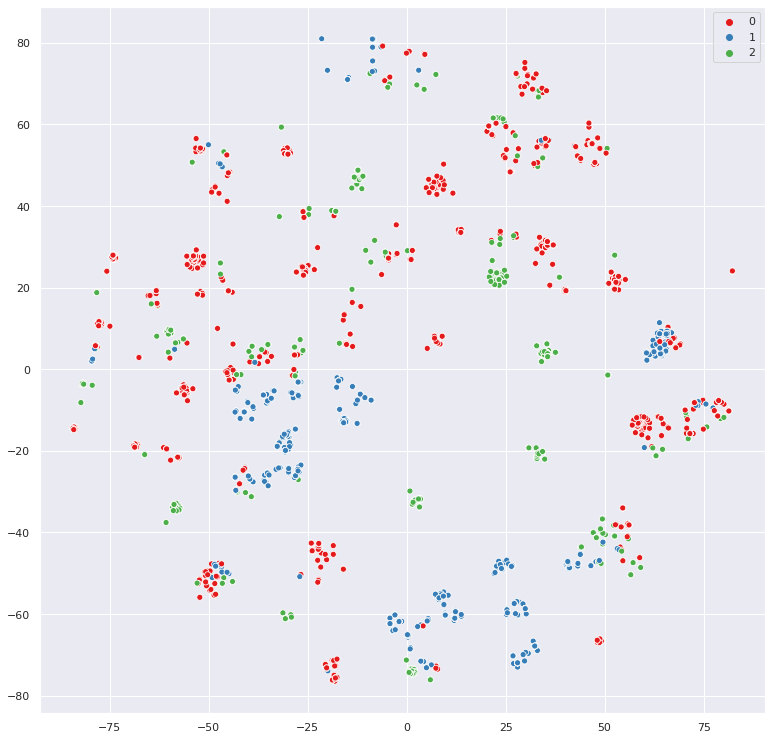

In [18]:
sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff318b629e8>,
      dtype=object)

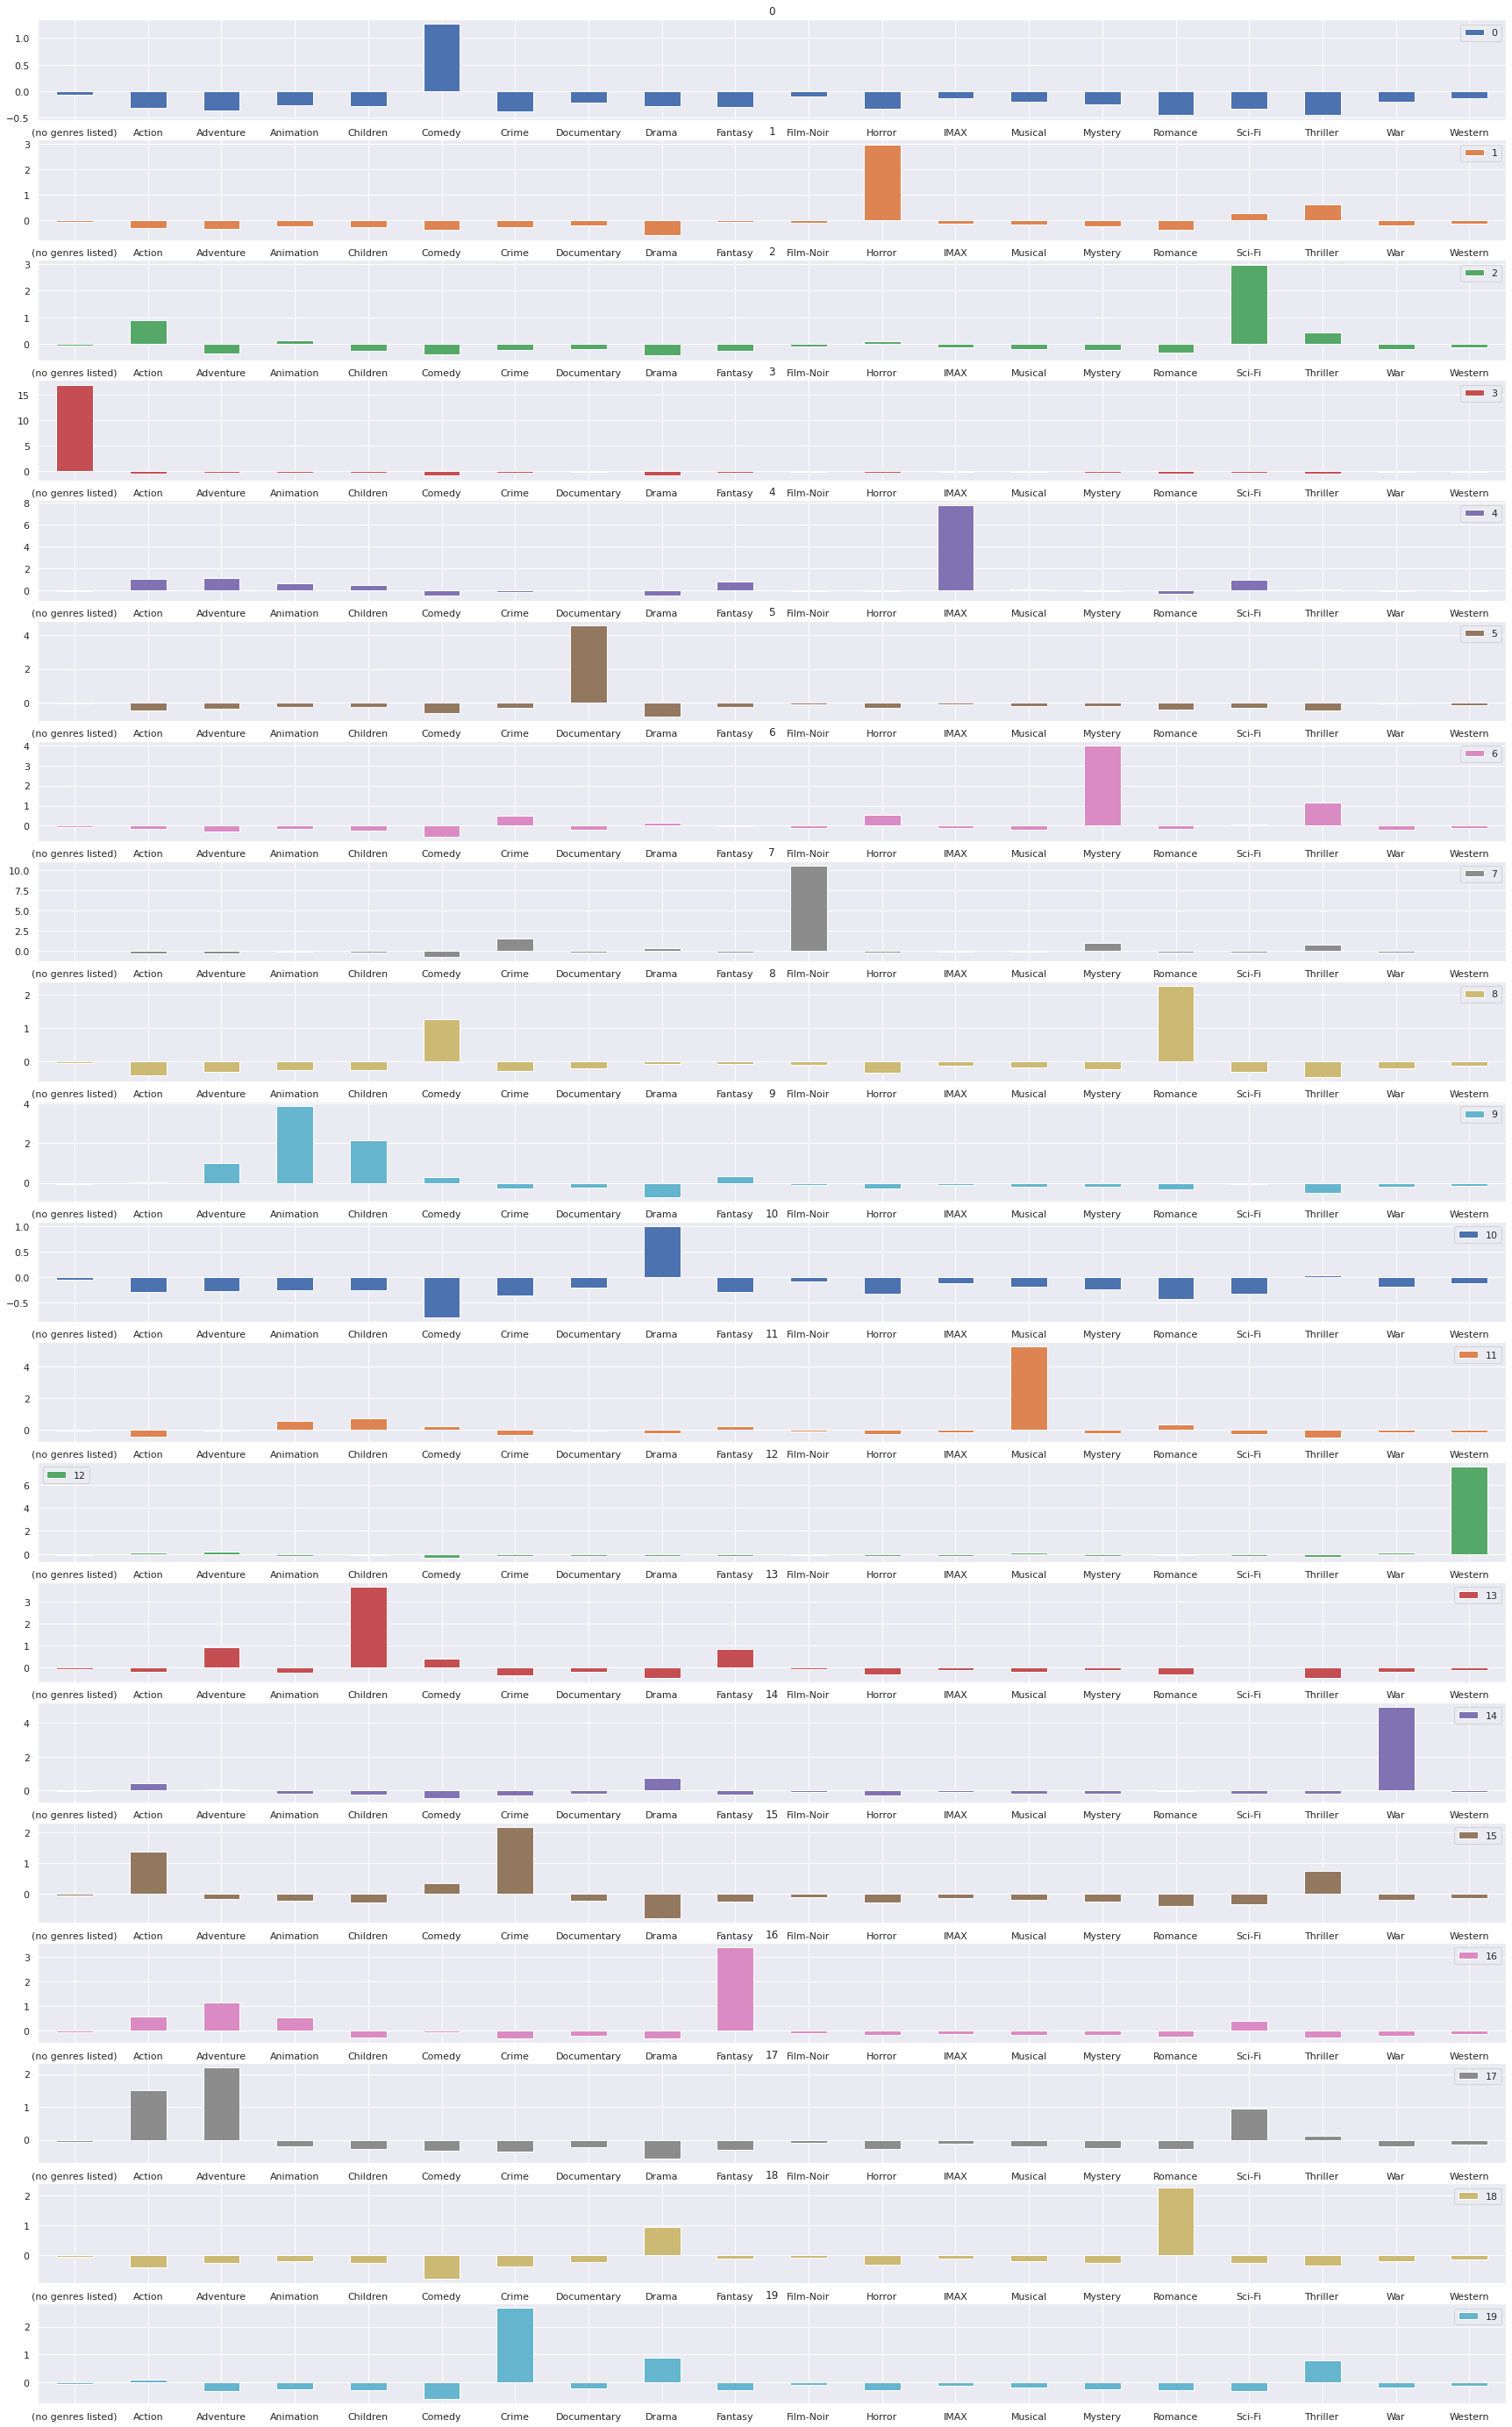

In [19]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,50),
                sharex=False,
                rot=0)

In [20]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3319,4492,Critters (1986),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1442,1965,Repo Man (1984),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6623,56022,Harrison Bergeron (1995),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3694,5094,Rollerball (2002),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9546,172875,A Detective Story (2003),Animation|Sci-Fi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
939,1240,"Terminator, The (1984)",Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2759,3697,Predator 2 (1990),Action|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8424,111360,Lucy (2014),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8778,128975,Hot Tub Time Machine 2 (2015),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5023,7811,Babylon 5: The River of Souls (1998),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [22]:
kmeans(20, generos_escalados)

[20, 54902.652860537586]

In [23]:
kmeans(3, generos_escalados)

[3, 166404.95393967986]

In [0]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

In [0]:
resultado = pd.DataFrame(resultado,
                         columns=['grupos', 'inertia'])

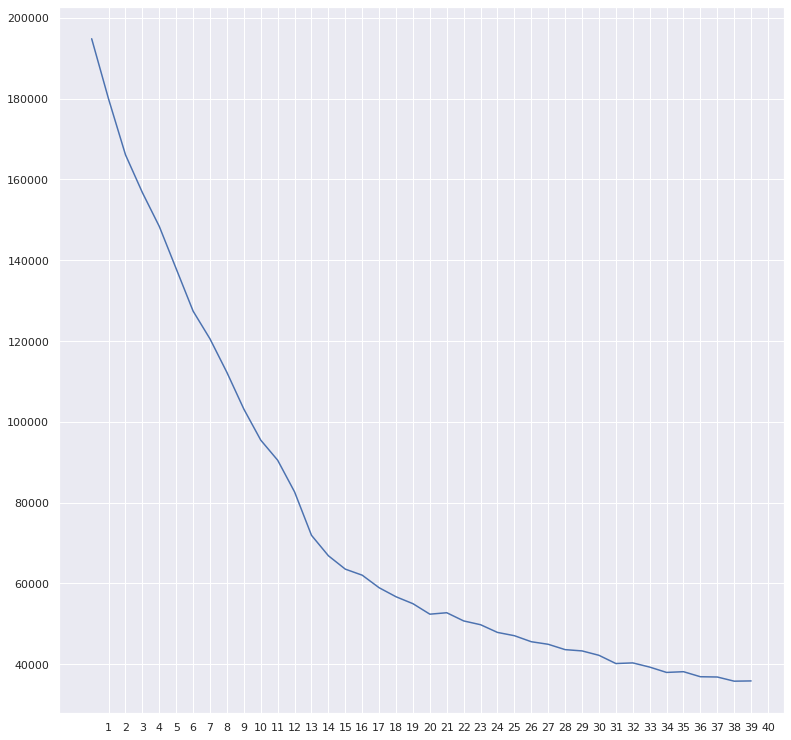

In [26]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff31592b390>,
      dtype=object)

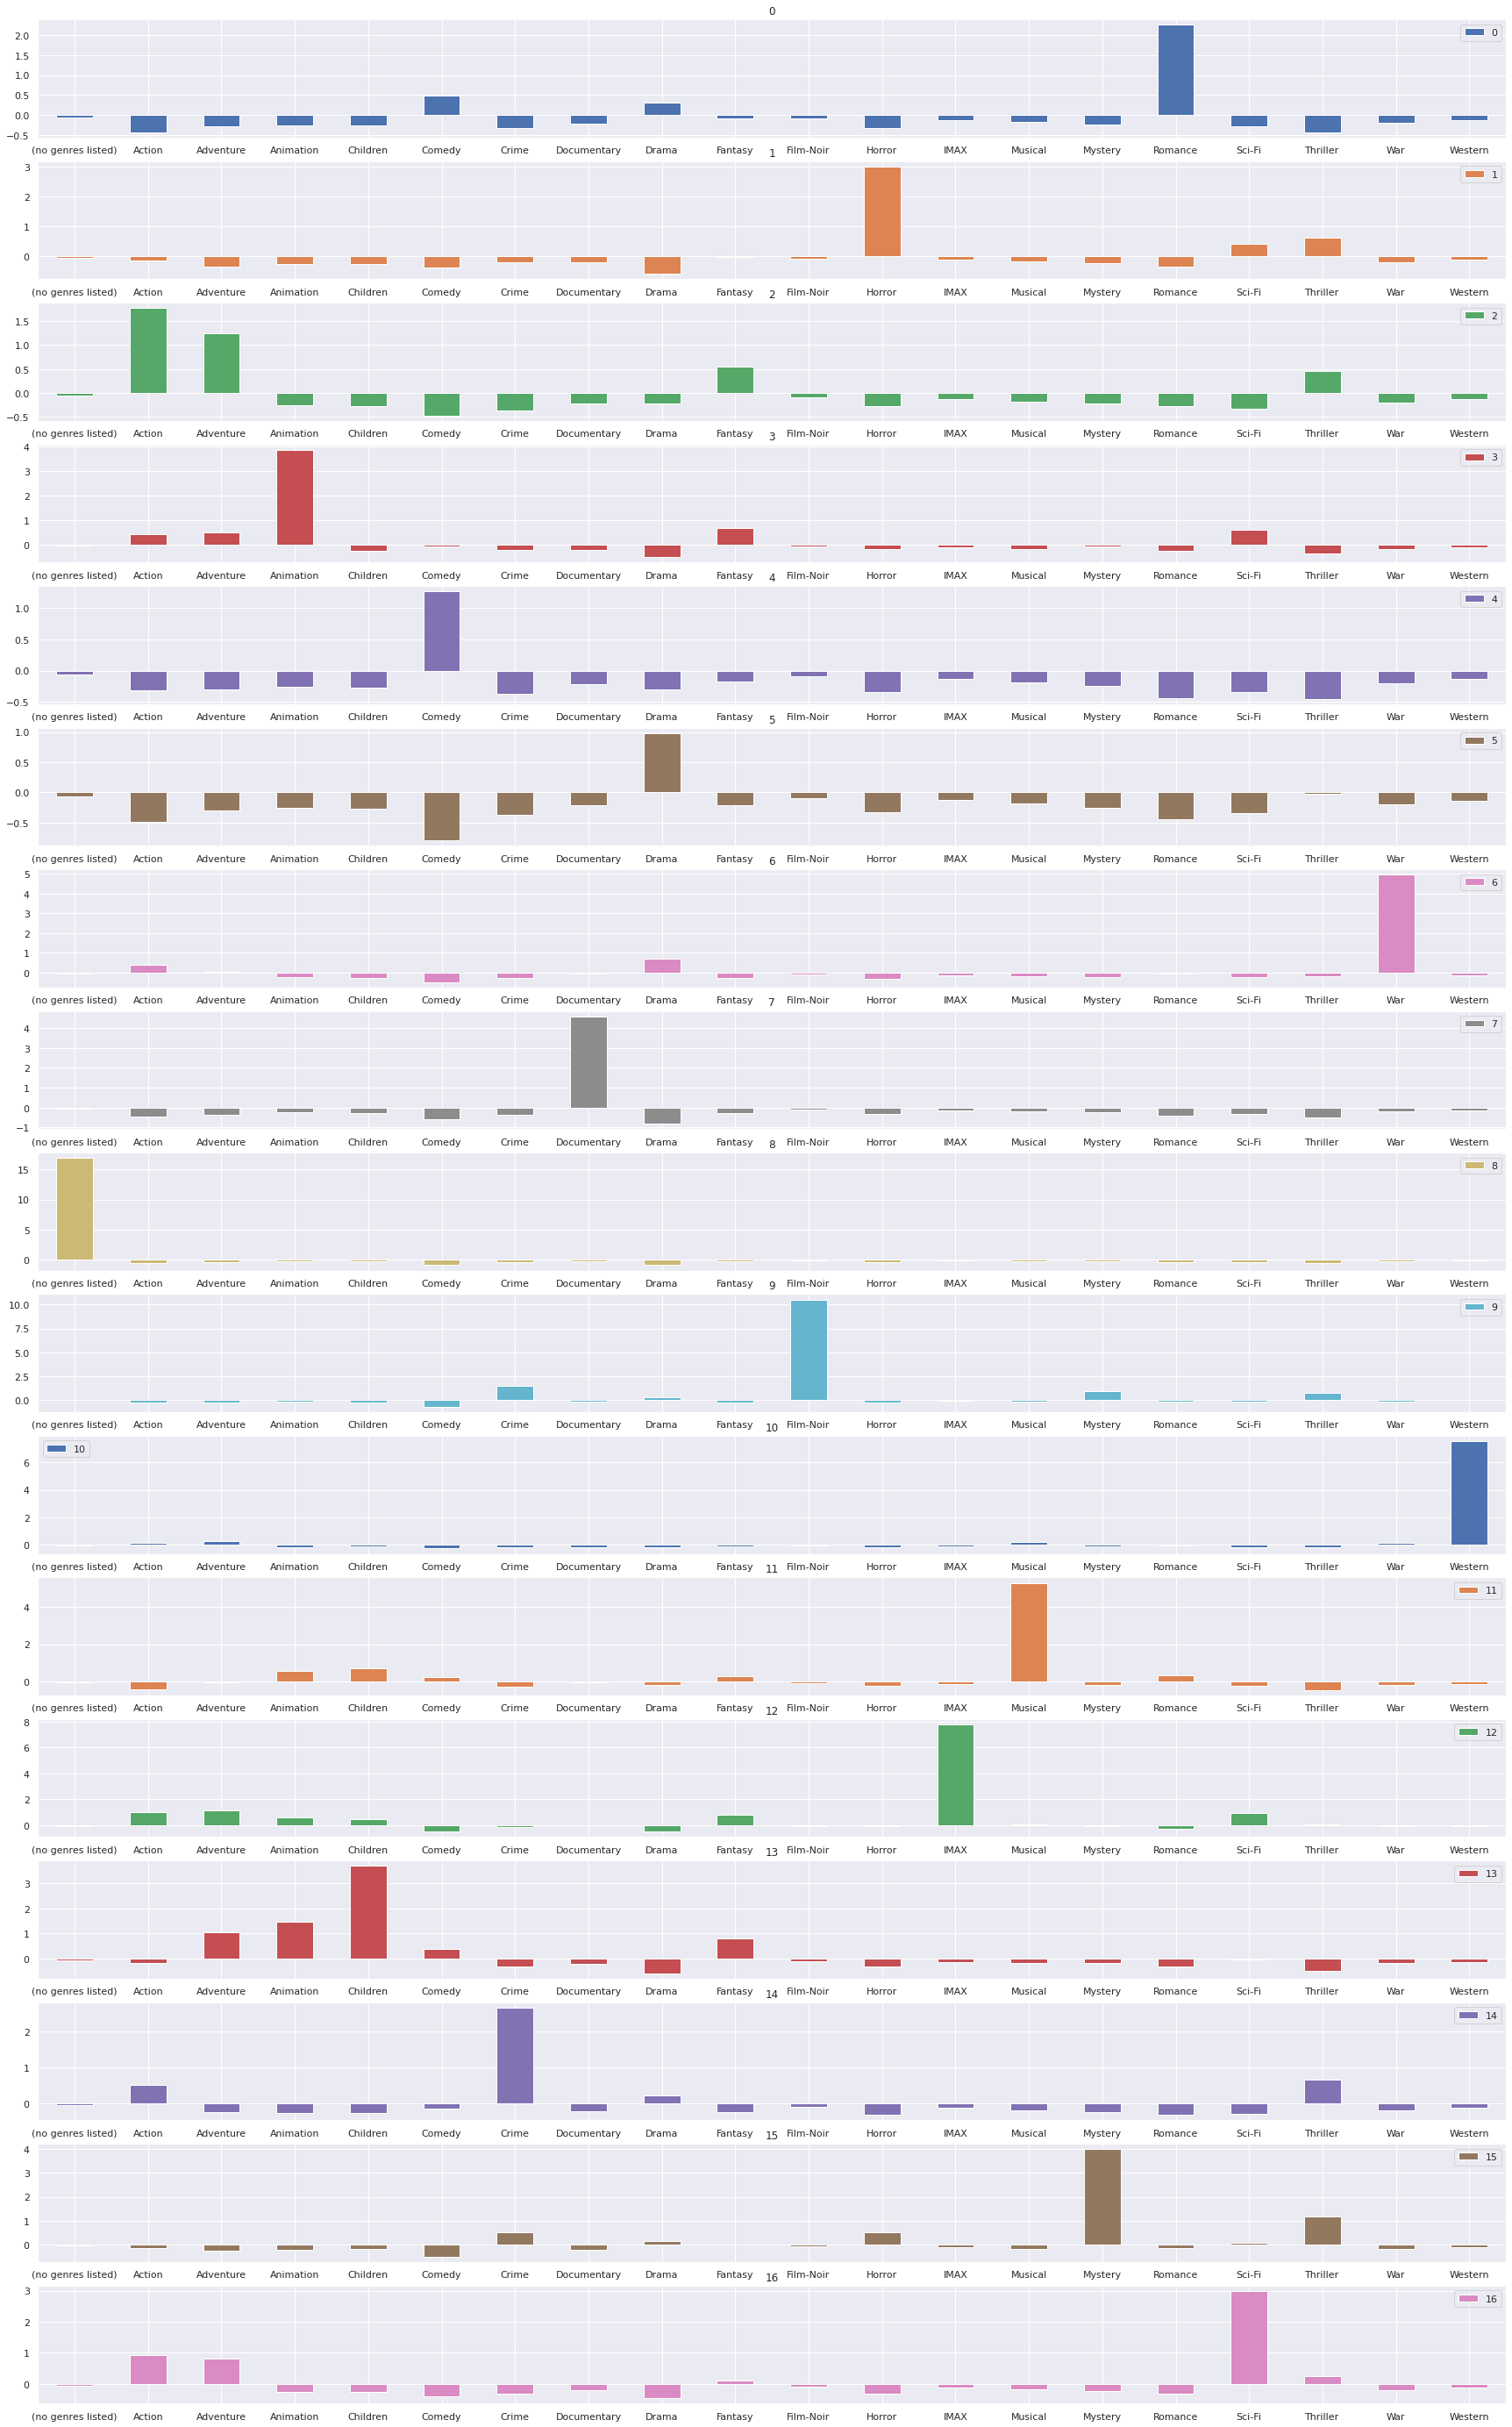

In [27]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,50),
                sharex=False,
                rot=0)

In [28]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9630,179053,2048: Nowhere to Run (2017),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
8956,136800,Robot Overlords (2014),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1054,1371,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3629,4980,Bill & Ted's Bogus Journey (1991),Adventure|Comedy|Fantasy|Sci-Fi,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9456,168026,Marvel One-Shot: Agent Carter (2013),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9391,163985,ARQ (2016),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
5190,8447,This Island Earth (1955),Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6769,60037,"Happening, The (2008)",Drama|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
6143,43928,Ultraviolet (2006),Action|Fantasy|Sci-Fi|Thriller,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0
7475,82095,Skyline (2010),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [0]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [10]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-35.67404  , -54.39314  ],
       [-11.141341 , -49.192215 ],
       [-18.059301 ,  54.28246  ],
       ...,
       [-14.764844 , -10.818708 ],
       [  4.4687166, -31.416517 ],
       [  1.4616271,  33.894566 ]], dtype=float32)

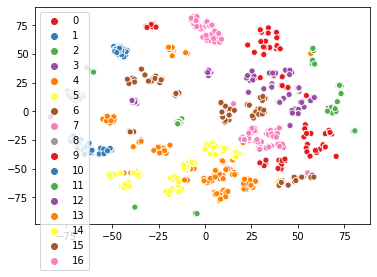

In [14]:
sns.scatterplot(x=visualizacao[:, 0],
                y=visualizacao[:, 1],
                hue=grupos,
                palette=sns.color_palette('Set1', 17))

In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f162523ee10>,
      dtype=object)

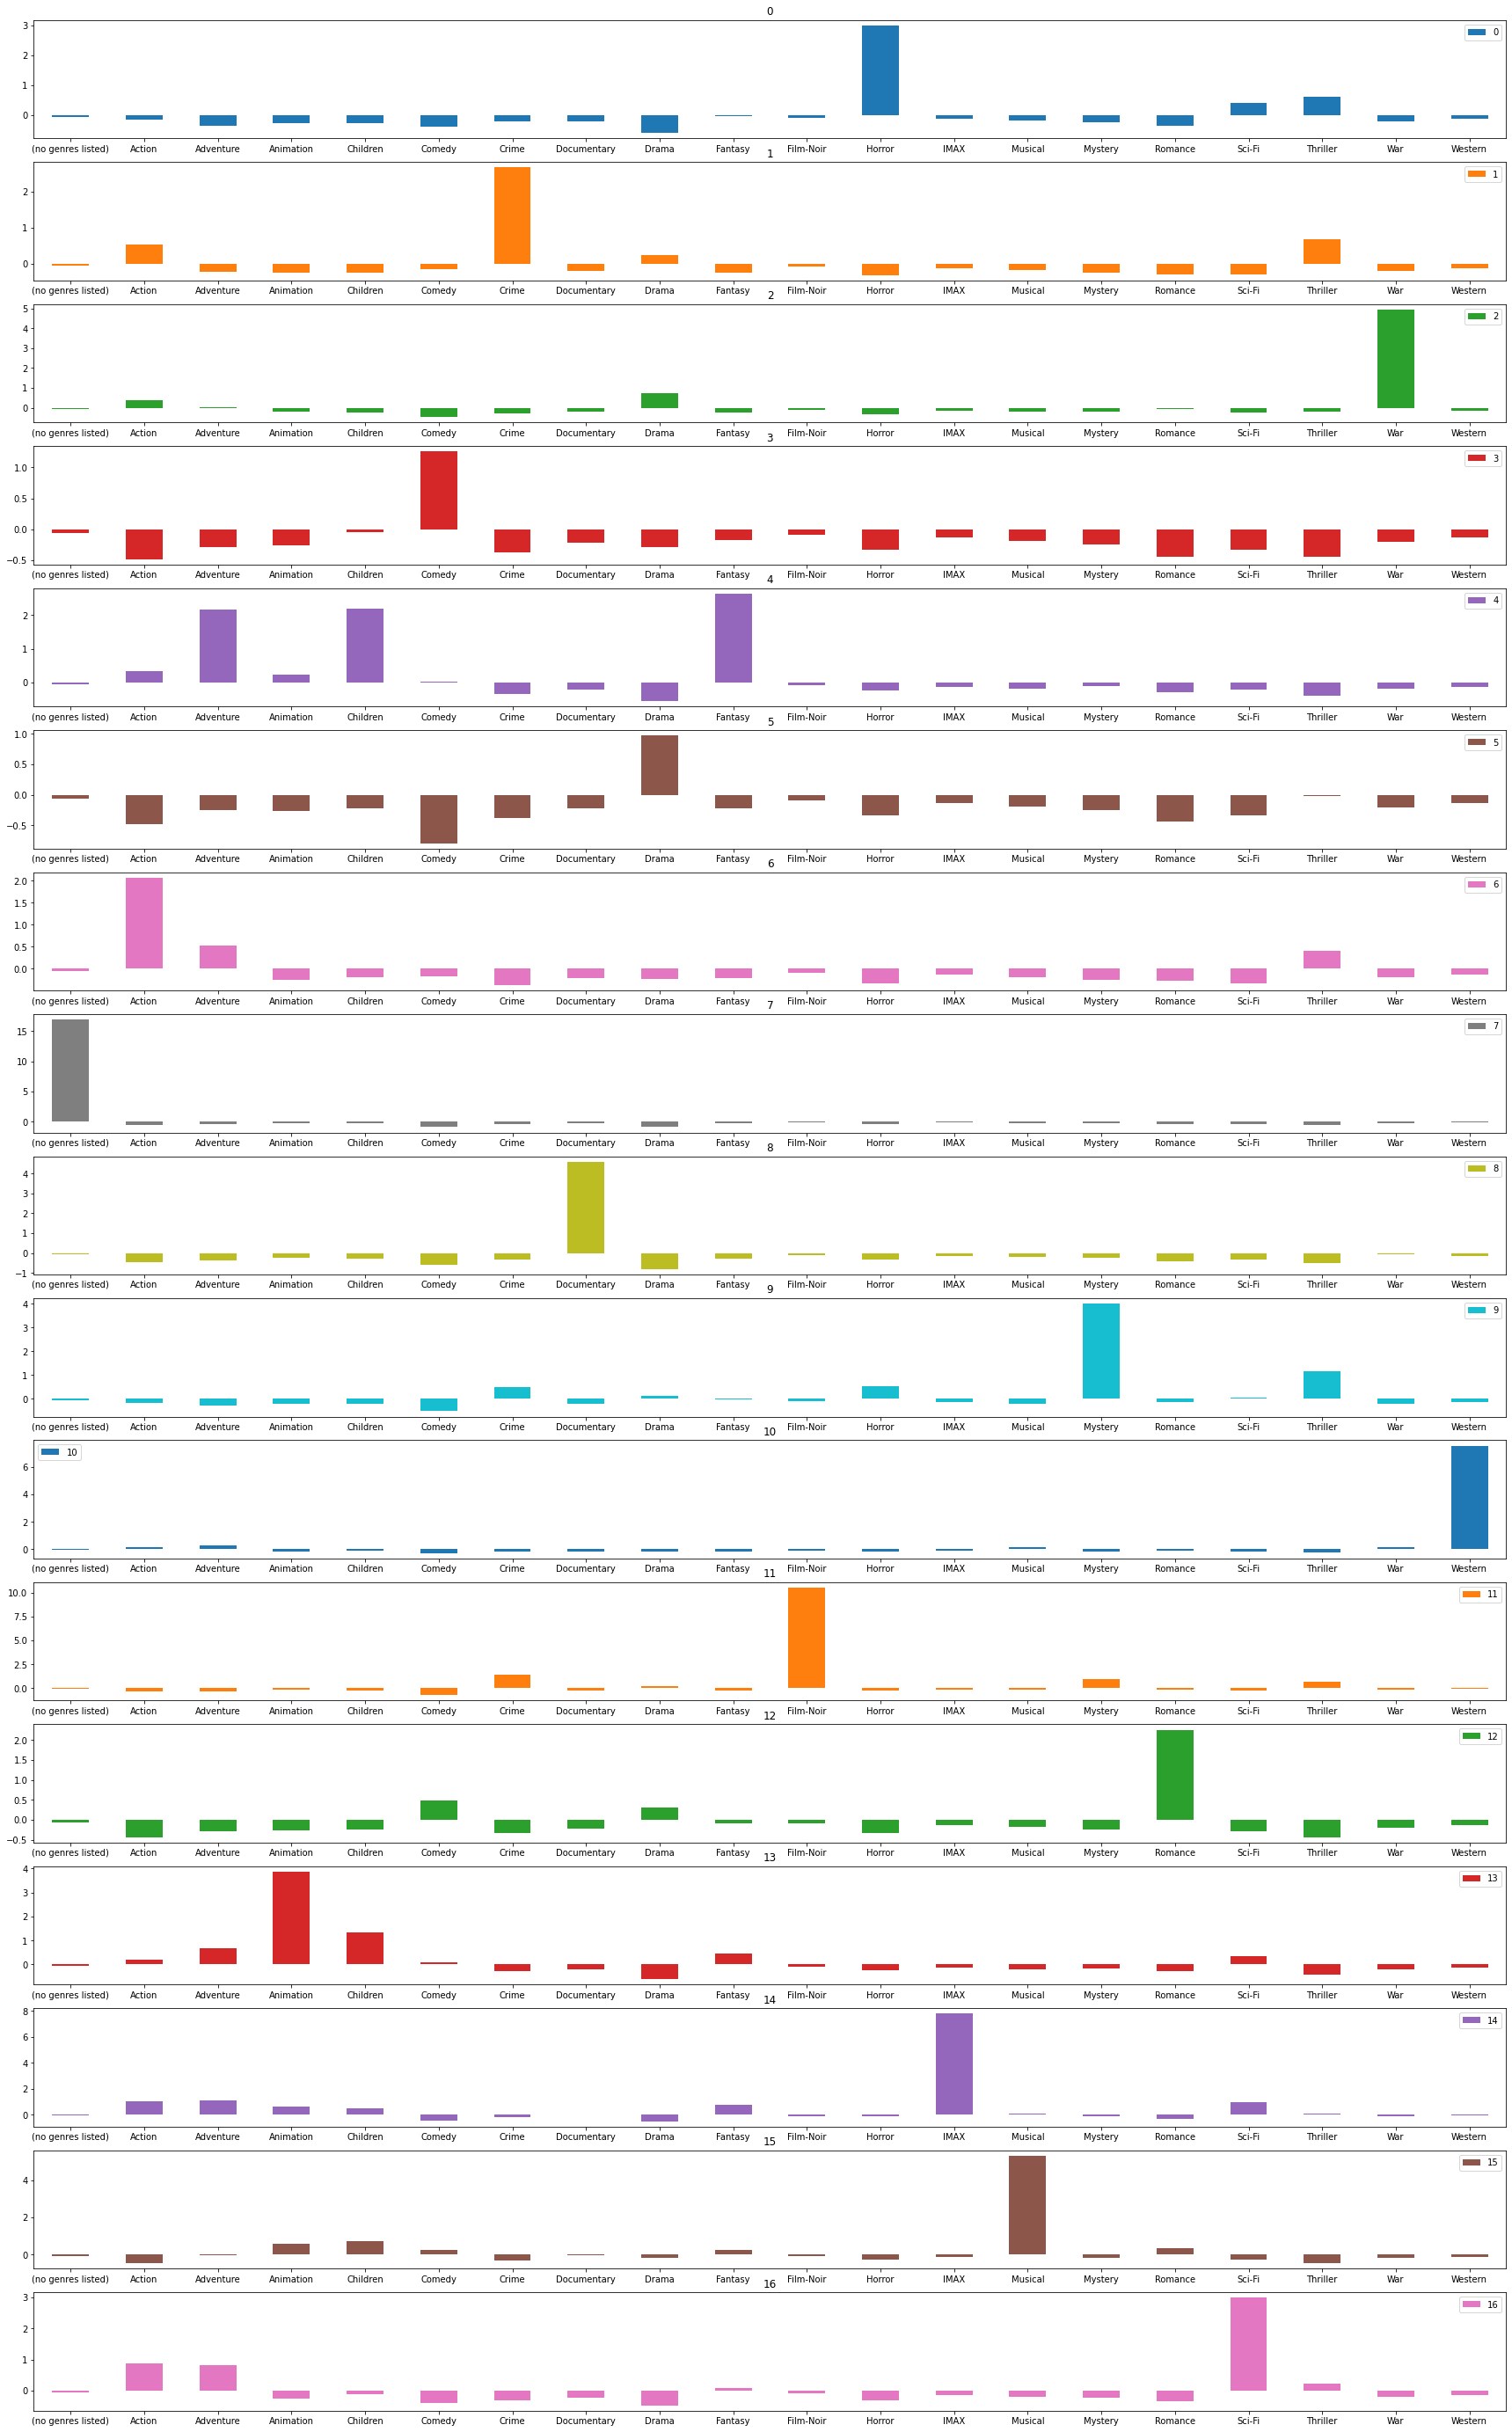

In [19]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,
                figsize=(30,50),
                sharex=False,
                rot=0)

In [20]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 3.        ,  5.        ,  2.45315489,  2.        ],
       [12.        , 17.        ,  2.88122932,  3.        ],
       [ 6.        , 18.        ,  3.03073045,  4.        ],
       [ 1.        , 19.        ,  3.42350371,  5.        ],
       [16.        , 20.        ,  3.58202209,  6.        ],
       [ 0.        , 21.        ,  3.85153883,  7.        ],
       [ 4.        , 22.        ,  4.54984873,  8.        ],
       [13.        , 23.        ,  4.61543144,  9.        ],
       [ 9.        , 24.        ,  4.70068412, 10.        ],
       [ 8.        , 25.        ,  5.16278608, 11.        ],
       [ 2.        , 26.        ,  5.27002305, 12.        ],
       [15.        , 27.        ,  5.7801754 , 13.        ],
       [10.        , 28.        ,  7.87662121, 14.        ],
       [14.        , 29.        ,  8.2864599 , 15.        ],
       [11.        , 30.        , 10.81637106, 16.        ],
       [ 7.        , 31.        , 17.06752042, 17.        ]])

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'b'],
 'dcoord': [[0.0, 2.4531548925090947, 2.4531548925090947, 0.0],
  [0.0, 2.8812293150968356, 2.8812293150968356, 2.4531548925090947],
  [0.0, 3.030730451455459, 3.030730451455459, 2.8812293150968356],
  [0.0, 3.423503705019355, 3.423503705019355, 3.030730451455459],
  [0.0, 3.582022085527127, 3.582022085527127, 3.423503705019355],
  [0.0, 3.8515388288693457, 3.8515388288693457, 3.582022085527127],
  [0.0, 4.54984872938578, 4.54984872938578, 3.8515388288693457],
  [0.0, 4.6154314351748384, 4.6154314351748384, 4.54984872938578],
  [0.0, 4.700684115200429, 4.700684115200429, 4.6154314351748384],
  [0.0, 5.1627860805274075, 5.1627860805274075, 4.700684115200429],
  [0.0, 5.270023048495131, 5.270023048495131, 5.1627860805274075],
  [0.0, 5.780175402510668, 5.780175402510668, 5.270023048495131],
  [0.0, 7.876621213687714, 7.876621213687714, 5.780175402510668],
  [0.0,

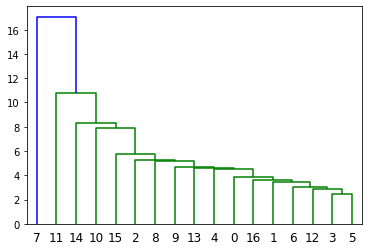

In [21]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma